# Topic modeling on PWDB textual data

## Importing libraries

In [2]:
import spacy
from spacy.tokens import Token
from spacy.tokens.doc import Doc
from spacy.tokens.span import Span

nlp = spacy.load("en_core_web_sm")

import gensim
from gensim.models import LdaModel

from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.topic_visualizer import generate_wordcloud
from sem_covid.services.data_registry import Dataset
from sem_covid.services.sc_wrangling.data_cleaning import clean_text_from_specific_characters
import pyLDAvis.gensim_models
from typing import List, Union

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Fetching data from document store

In [3]:
pwdb = Dataset.PWDB.fetch()

document_corpus = pwdb['title'].map(str) + '. ' + \
                  pwdb['background_info_description'].map(str) + '. ' + \
                  pwdb['content_of_measure_description'].map(str) + '. ' + \
                  pwdb['use_of_measure_description'] + '. ' + \
                  pwdb['involvement_of_social_partners_description']

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

100% (1288 of 1288) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


## Data preprocessing
- data cleanup
- turn corpus into spacy Docs

In [4]:
unused_characters = ["\\r", ">", "\n", "\\", "<", "''", "%", "...", "\'", '"', "(", "\n", "*", "1)", "2)", "3)",
                     "[", "]"]
document_corpus = document_corpus.apply(clean_text_from_specific_characters, characters=unused_characters)
spacy_corpus = document_corpus.apply(nlp)


/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Defining filtering functions
 Helper functions for filtering spacy documents

In [5]:
spacy_stop_words = nlp.Defaults.stop_words

def filter_stop_words(doc: List[Token], stop_words: List[str] = nlp.Defaults.stop_words) -> List[Token]:
    """
        turn a spacy Doc into a list of token and remove stop words
    """
    return [token for token in doc if str(token) not in stop_words]

def filter_pos(doc:Doc, pos: Union[str,List[str]]) -> List[Token]:
    """
        filter out tokens that have the provided POS
    """
    poses = []
    if isinstance(pos,str):
        poses = [pos]
    else:
        poses = pos
    return [token for token in doc if token.pos_ not in poses]

def select_pos(doc:Doc, pos: Union[str,List[str]]) -> List[str]:
    """
        select tokens that have the desired POS
    """
    poses = []
    if isinstance(pos,str):
        poses = [pos]
    else:
        poses = pos
    return [token for token in doc if token.pos_ in poses]

def filter_stop_words_on_a_span_list(span_list: List[Span],
                                     stop_words: List[str] = nlp.Defaults.stop_words) -> List[str]:
    """
        Spacy noun phrases are provided as a list of Spans.
        Some noun phrases contain stop words, and we want those removed.
    """
    return list(filter(None, ["_".join(map(str, filter_stop_words(span, stop_words))) for span in span_list]))


/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Preparing few corpora

Filter document tokens. Select only the needed/interesting tokens for Topic modeling:
   - all words,
   - nouns
   - verbs
   - noun phrases

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



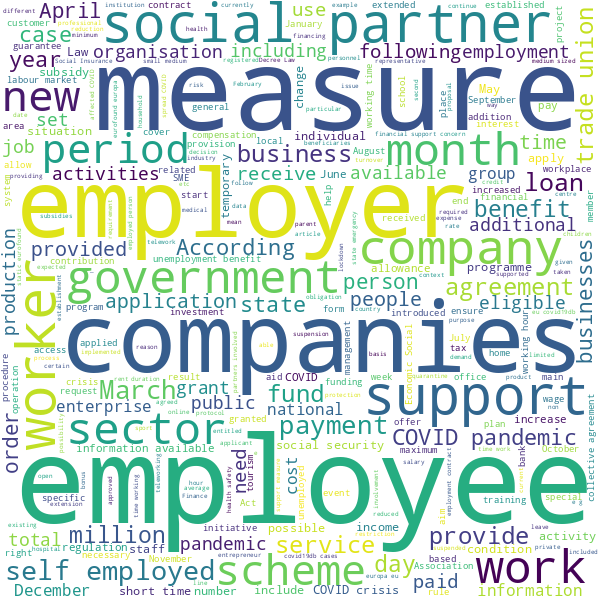

In [6]:
word_corpus = spacy_corpus.apply(filter_stop_words, stop_words=spacy_stop_words)
word_corpus = word_corpus.apply(filter_pos, pos="PUNCT")
word_corpus = word_corpus.apply(lambda x: list(map(str,x)))

generate_wordcloud( " ".join( [" ".join(doc) for doc in word_corpus]) )

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



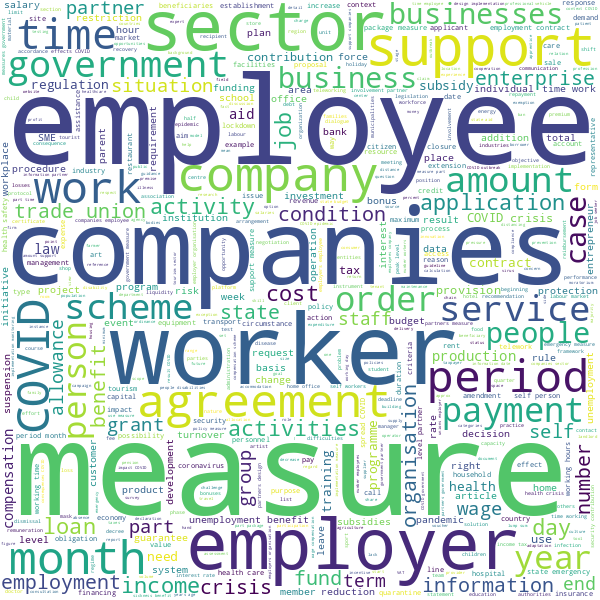

In [7]:
noun_corpus = spacy_corpus.apply(select_pos, pos="NOUN")
noun_corpus = noun_corpus.apply(lambda x: list(map(str,x)))

generate_wordcloud( " ".join( [" ".join(doc) for doc in noun_corpus]) )

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



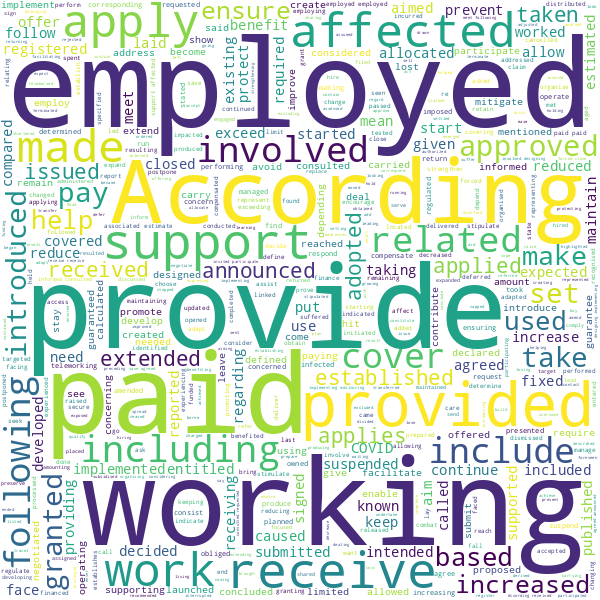

In [8]:
verb_corpus = spacy_corpus.apply(select_pos, pos="VERB")
verb_corpus = verb_corpus.apply(lambda x: list(map(str,x)))

generate_wordcloud( " ".join( [" ".join(doc) for doc in verb_corpus]) )

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



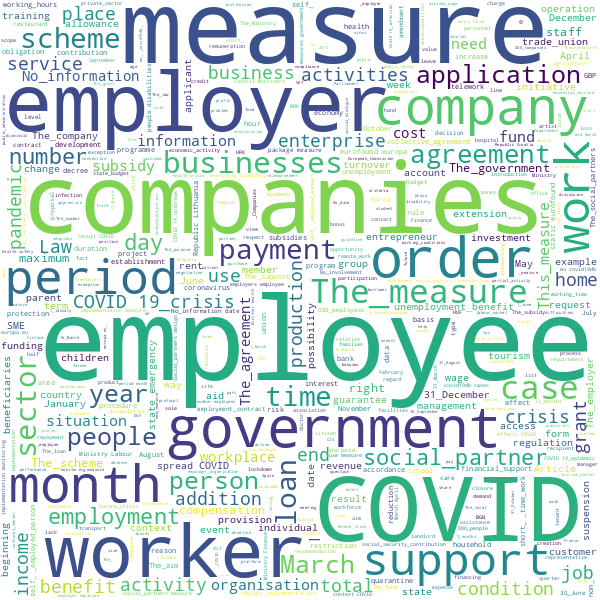

In [9]:
noun_phrase_corpus = spacy_corpus.apply(lambda x: x.noun_chunks)
noun_phrase_corpus = noun_phrase_corpus.apply(filter_stop_words_on_a_span_list)

generate_wordcloud( " ".join( [" ".join(doc) for doc in noun_phrase_corpus]) )

## Train LDA model

- create a dictionary and a corpus with each corpora
- train LDA model
- visualize the results

In [25]:
word_dictionary = gensim.corpora.Dictionary(word_corpus)
noun_dictionary = gensim.corpora.Dictionary(word_corpus)
verb_dictionary = gensim.corpora.Dictionary(verb_corpus)
noun_phrases_dictionary = gensim.corpora.Dictionary(noun_phrase_corpus)

word_frequency = [word_dictionary.doc2bow(words) for words in word_corpus]
noun_frequency = [noun_dictionary.doc2bow(words) for words in noun_corpus]
verb_frequency = [verb_dictionary.doc2bow(words) for words in verb_corpus]
noun_phrases_frequency = [noun_phrases_dictionary.doc2bow(words) for words in noun_phrase_corpus]

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
word_lda_model = LdaModel(corpus=word_frequency, num_topics=15, id2word=word_dictionary, chunksize=100, random_state=100)
noun_lda_model = LdaModel(corpus=noun_frequency, num_topics=15, id2word=noun_dictionary, chunksize=100, random_state=100)
verb_lda_model = LdaModel(corpus=verb_frequency, num_topics=15, id2word=verb_dictionary, chunksize=100, random_state=100)
noun_phrases_lda_model = LdaModel(corpus=noun_phrases_frequency, num_topics=15, id2word=noun_phrases_dictionary, chunksize=100, random_state=100)

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [40]:
pyLDAvis.enable_notebook()
word_visualization = pyLDAvis.gensim_models.prepare(word_lda_model, word_frequency, word_dictionary)
word_visualization

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.221404 -0.010875       1        1  27.713690
4     -0.202901 -0.060208       2        1  19.921699
3     -0.225209  0.156398       3        1  16.662085
5     -0.201452  0.074298       4        1  15.107748
2     -0.107718 -0.161484       5        1   4.641597
13    -0.076602 -0.099925       6        1   4.123688
9     -0.094424  0.145482       7        1   3.677360
10    -0.066177 -0.098553       8        1   2.788523
1      0.056668 -0.163154       9        1   1.993285
12     0.001490  0.076821      10        1   1.770314
0      0.188101  0.058567      11        1   0.663892
6      0.181744  0.070898      12        1   0.486705
8      0.263088  0.014018      13        1   0.244399
11     0.229729  0.002193      14        1   0.161185
7      0.275066 -0.004475      15        1   0.043830, topic_info=           Term         Freq        Total Category  logprob  loglift
26          The  7208.000000  7208.000000  Default  30.0000  30.0000
436           €  2827.000000  2827.000000  Default  29.0000  29.0000
39      company   944.000000   944.000000  Default  28.0000  28.0000
38    companies  1818.000000  1818.000000  Default  27.0000  27.0000
792               610.000000   610.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
10     COVID-19     0.012749  2425.102111  Topic15  -9.2145  -4.4233
420     million     0.012123  1521.330881  Topic15  -9.2649  -4.0074
869   situation     0.011442   479.950481  Topic15  -9.3227  -2.9116
490  government     0.011674  1109.778872  Topic15  -9.3026  -3.7297
5          2020     0.011964  3812.323305  Topic15  -9.2781  -4.9393

[999 rows x 6 columns], token_table=      Topic      Freq Term
term                      
119       1  0.428561   \r
119       2  0.214566   \r
119       3  0.099864   \r
119       4  0.138669   \r
119       5  0.033098   \r
...     ...       ...  ...
436       8  0.020864    €
436       9  0.000707    €
436      10  0.021571    €
436      11  0.000354    €
436      12  0.001061    €

[2739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 5, 4, 6, 3, 14, 10, 11, 2, 13, 1, 7, 9, 12, 8])

In [41]:
noun_visualization = pyLDAvis.gensim_models.prepare(noun_lda_model, noun_frequency, noun_dictionary)
noun_visualization

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.316123  0.134935       1        1  43.733521
3     -0.288877 -0.039258       2        1  18.984924
12    -0.195581 -0.115998       3        1   9.339949
2     -0.202865 -0.015242       4        1   8.388577
1     -0.039785  0.225737       5        1   5.008579
13    -0.125786 -0.026609       6        1   4.716631
10    -0.060764 -0.166472       7        1   4.119518
11     0.065831  0.081342       8        1   1.657444
8      0.017311 -0.060774       9        1   1.548301
6      0.179340  0.015222      10        1   0.849837
0      0.176537 -0.002966      11        1   0.596780
4      0.163459 -0.017209      12        1   0.512368
5      0.206477 -0.007875      13        1   0.308061
7      0.212241 -0.001866      14        1   0.130511
9      0.208587 -0.002968      15        1   0.105000, topic_info=            Term         Freq        Total Category  logprob  loglift
39       company   878.000000   878.000000  Default  30.0000  30.0000
636      support  1411.000000  1411.000000  Default  29.0000  29.0000
38     companies  1717.000000  1717.000000  Default  28.0000  28.0000
96        scheme   828.000000   828.000000  Default  27.0000  27.0000
2728        loan   321.000000   321.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
501      measure     0.016978  1856.987684  Topic15  -8.9718  -4.7436
524        state     0.015880   723.738336  Topic15  -9.0387  -3.8681
109        trade     0.014878   472.978065  Topic15  -9.1039  -3.5079
57     employees     0.014931  2047.958206  Topic15  -9.1003  -4.9699
490   government     0.014425  1053.355049  Topic15  -9.1348  -4.3396

[881 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         1  0.279270        -
2         2  0.553641        -
2         3  0.014698        -
2         4  0.004899        -
2         6  0.019598        -
...     ...       ...      ...
118       7  0.195134    years
118       9  0.010993    years
118      11  0.002748    years
643       2  0.953477        z
644       2  0.985930  zmianie

[1784 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 4, 13, 3, 2, 14, 11, 12, 9, 7, 1, 5, 6, 8, 10])

In [42]:
verb_visualization = pyLDAvis.gensim_models.prepare(verb_lda_model, verb_frequency, verb_dictionary)
verb_visualization

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.175399  0.049561       1        1  16.446010
8      0.169854 -0.039370       2        1  15.886875
4      0.184065  0.086722       3        1  14.391008
11     0.140353 -0.014699       4        1  10.864387
7      0.108058  0.039674       5        1   8.586580
6      0.089954 -0.129477       6        1   7.162694
9     -0.013228 -0.172712       7        1   5.393004
10    -0.035703 -0.173146       8        1   4.626543
2      0.054041  0.170908       9        1   4.217749
5     -0.020544  0.068396      10        1   3.100310
1     -0.148743 -0.151624      11        1   3.085556
12    -0.148346  0.084985      12        1   2.219838
13    -0.150747  0.033415      13        1   1.947077
14    -0.177128  0.074617      14        1   1.282767
0     -0.227284  0.072750      15        1   0.789602, topic_info=         Term        Freq       Total Category  logprob  loglift
30    working  696.000000  696.000000  Default  30.0000  30.0000
100  employed  924.000000  924.000000  Default  29.0000  29.0000
72       paid  747.000000  747.000000  Default  28.0000  28.0000
36   affected  443.000000  443.000000  Default  27.0000  27.0000
370   granted  302.000000  302.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
59   includes    1.566649  160.875097  Topic15  -5.5228   0.2097
651   benefit    1.281380  140.259892  Topic15  -5.7238   0.1458
85       used    1.408327  284.025389  Topic15  -5.6293  -0.4653
179        be    0.950596  773.420124  Topic15  -6.0224  -1.8601
56       have    0.777988  658.251749  Topic15  -6.2227  -1.8992

[806 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
132       3  0.986902          -
32        1  0.088010  According
32        2  0.173353  According
32        3  0.216024  According
32        4  0.181354  According
...     ...       ...        ...
30       12  0.001437    working
30       13  0.008620    working
921      13  0.973299      works
31        3  0.686430    written
31       11  0.228810    written

[1640 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 5, 12, 8, 7, 10, 11, 3, 6, 2, 13, 14, 15, 1])

In [43]:
noun_phrases_visualization = pyLDAvis.gensim_models.prepare(noun_phrases_lda_model, noun_phrases_frequency, noun_phrases_dictionary)
noun_phrases_visualization

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.386579 -0.052632       1        1  47.698001
1      0.287525  0.108431       2        1  21.433107
6      0.060546 -0.186777       3        1   6.834183
11     0.061984  0.028823       4        1   4.982553
2      0.020978  0.008858       5        1   4.465040
3     -0.000153  0.068423       6        1   3.797277
7     -0.064745  0.010069       7        1   2.606304
9     -0.061398  0.028469       8        1   2.437762
10    -0.045881 -0.009615       9        1   1.938568
0     -0.105193 -0.005876      10        1   1.059778
5     -0.095011  0.003481      11        1   0.773062
4     -0.109172 -0.000920      12        1   0.713352
14    -0.110070 -0.000366      13        1   0.480688
8     -0.111163  0.001249      14        1   0.407292
12    -0.114826 -0.001618      15        1   0.373032, topic_info=            Term         Freq        Total Category  logprob  loglift
425   government   815.000000   815.000000  Default  30.0000  30.0000
23     agreement   316.000000   316.000000  Default  29.0000  29.0000
344     measures  1115.000000  1115.000000  Default  28.0000  28.0000
121    employees  2164.000000  2164.000000  Default  27.0000  27.0000
1125     support   723.000000   723.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1354      crisis     0.029247   438.246737  Topic15  -9.6545  -4.0235
163       people     0.029306   569.732639  Topic15  -9.6525  -4.2839
343      measure     0.028500  1462.429042  Topic15  -9.6803  -5.2544
46        period     0.025896   877.208523  Topic15  -9.7762  -4.8391
425   government     0.025189   815.038272  Topic15  -9.8038  -4.7933

[765 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3636      8  0.951908        -_time
3239      2  0.981912             .
3239      3  0.011830             .
2203      7  0.927745        10_May
804       4  0.957192  10_employees
...     ...       ...           ...
64        2  0.725403         years
64        3  0.005219         years
64        4  0.005219         years
64        5  0.005219         years
64        6  0.104375         years

[1298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 2, 7, 12, 3, 4, 8, 10, 11, 1, 6, 5, 15, 9, 13])